In [1]:
# DIRECTORY SET
import os
import sys
from pathlib import Path
base_dir=Path(os.getcwd()).parent.parent
os.chdir(base_dir)
print(os.getcwd())

d:\DestinyFolder\DestinyRecaps\DestinyRecapsApi\serverproject


In [2]:
import dotenv
dotenv.load_dotenv()

True

In [3]:
# DJANGO SETUP
import django
sys.path.append(os.path.abspath(''))
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "serverproject.settings")
django.setup()

# Import async modules
import asyncio
from asgiref.sync import sync_to_async

# Import display modules
from IPython.display import display, Markdown

# Import other modules
import faiss

# import reloading
from importlib import reload

In [4]:
%load_ext autoreload
%autoreload 2

from destinyapp.models import StreamRecapData

from destinyapp.customlibrary import services
from destinyapp.customlibrary import utils

In [ ]:
del services
from destinyapp.customlibrary import services
reload(services)

del utils
from destinyapp.customlibrary import utils
reload(utils)

# Start of visualization development

In [5]:
video_id="3kJr7ODrwNw"

In [43]:
# load the video data
stream_recap_data=await utils.get_recap_data(video_id)

In [40]:
# # process the raw transcript

# transcript, linked_transcript=await services.process_raw_transcript(stream_recap_data.raw_transcript_data, stream_recap_data.video_id)

# stream_recap_data.transcript=transcript
# stream_recap_data.linked_transcript=linked_transcript
# await sync_to_async(stream_recap_data.save)()

AttributeError: 'NoneType' object has no attribute 'raw_transcript_data'

In [44]:
test_text_chunks=await services.visualization.create_text_chunks(stream_recap_data.transcript, 0)

Number of chunks:  88


In [ ]:
"""Content Creation and Streaming
Political Commentary
Platform Issues
Technical Discussions
Personal and Relationship Topics"""

In [61]:
from IPython.display import display, HTML
display(HTML(stream_recap_data.recap))

In [45]:
chunk_batches=await services.visualization.generate_text_chunk_batches(test_text_chunks)

In [46]:
for batch in chunk_batches:
    print(len(batch))

10
10
10
10
10
10
10
10
8


In [97]:
topic_annotations_str=await services.visualization.annotate_major_minor_topics(stream_recap_data.recap)

Cost:  0.007227000000000001


In [168]:
print(topic_annotations_str)

Major Topics:

Category: 'Content Creation and Streaming' | Context: Destiny's upcoming shows, travel plans, video production issues, typing speed, criticism of political content on Twitch, relationships with other streamers, and debates with content creators.

Category: 'Political Commentary' | Context: Destiny's critiques of various political commentators, analysis of current online political landscape, discussion of COVID-19 predictions, and commentary on the Israel-Palestine conflict.

Category: 'Platform Issues' | Context: Destiny's desire to be unbanned on Twitch, frustration with the platform's handling of threats and defamation, and discussion of Twitter API and bot operations.

Category: 'Technical Discussions' | Context: Analysis of a supposed Russian bot operation on Twitter, debate on the authenticity of a ChatGPT error message, and discussion of API calls, error codes, and middleware services.

Category: 'Personal and Relationship Topics' | Context: Commentary on relations

In [169]:
# response_str=await services.visualization.annotate_batch(chunk_batches[0], stream_recap_data.recap)
response_str=await services.visualization.annotate_batch(chunk_batches[0], topic_annotations_str)

Cost:  0.014346000000000001


In [170]:
test_annotated_segments=services.visualization.process_annotation_response(response_str)
print(len(test_annotated_segments))

10


In [171]:
for i, annotated_segment in enumerate(test_annotated_segments):
    # print(f"Segment {i}: {annotated_segment}")
    category=annotated_segment["category"]
    print(f"Segment {i}: {category}")

Segment 0: Content Creation and Streaming
Segment 1: Content Creation and Streaming
Segment 2: Technical Discussions
Segment 3: Technical Discussions
Segment 4: Content Creation and Streaming
Segment 5: Stonehenge vandalism
Segment 6: Platform Issues
Segment 7: Political Commentary
Segment 8: Content Creation and Streaming
Segment 9: Political Commentary


In [166]:
print(test_text_chunks[4])

 160. Well, depending on the test you give me, I can get over 160. Just depends on the test. Like this typing test, the verification test that it makes you take after to verify your speed. Always. You always get like huge values on that. I don't know why. 159 on this and 181 on this. You always get the. For some reason this one, it either rates you high or something happens, I don't know. Just give him a remote PC in your office he can connect to and do the work from. Can you really remote into a desktop and do video editing? I feel like that would be laggy as fuck. I don't. I am a film student. Loving the BMP Cc six k. You can easily film in raw with 112 bit quality. Should be more than enough to cc and upload to YouTube. No, no, it's not about uploading YouTube, it's about sending it to my editor in Australia. Oh my. That's okay, whatever. Short stream stream for an hour. Do you see that? Some stopped oil group just damaged stonehenge. Didnt t they try to sit on a fire? Can you reall

In [167]:
test_annotated_segments

[{'segment': 1,
  'category': 'Content Creation and Streaming',
  'annotation': "Destiny discusses upcoming shows, travel plans including meeting Alex O'Connor and a trip to LA, and issues with large video files from the Blackmagic Pocket 6K camera."},
 {'segment': 2,
  'category': 'Technical Discussions',
  'annotation': "Conversation about video file compression, lossless trimming, and the Blackmagic Pocket 6K camera's file sizes and recording capacity."},
 {'segment': 3,
  'category': 'Technical Discussions',
  'annotation': 'Detailed calculations about file sizes, upload and download times for large video files, and discussion about internet speeds for file transfer.'},
 {'segment': 4,
  'category': 'Content Creation and Streaming',
  'annotation': "Explanation of the video editing process with August (Destiny's editor) and the challenges with large file sizes. Also includes a typing speed test result."},
 {'segment': 5,
  'category': 'non categorized',
  'annotation': 'Continuatio

In [172]:
# responses, annotated_results=await services.visualization.annotate_all_batches(chunk_batches, stream_recap_data.recap)
responses, annotated_results=await services.visualization.annotate_all_batches(chunk_batches, topic_annotations_str)

Cost:  0.013023
Cost:  0.013455
Cost:  0.013464
Cost:  0.011904000000000001
Cost:  0.013947000000000001
Cost:  0.014271
Cost:  0.014814
Cost:  0.014121
Cost:  0.016587


In [85]:
annotated_results

[{'segment': 1,
  'category': 'Streaming and Content Creation',
  'annotation': "About Destiny's upcoming streaming schedule, interviews, and technical issues with video file sizes from camera recordings."},
 {'segment': 2,
  'category': 'Technical Discussion',
  'annotation': "About video compression, file sizes, and camera specifications for Destiny's recordings."},
 {'segment': 3,
  'category': 'Technical Discussion',
  'annotation': 'Detailed calculations about file sizes and upload times for large video files.'},
 {'segment': 4,
  'category': 'Technical Discussion',
  'annotation': 'Continued discussion on file sizes, upload/download times, and potential solutions for handling large video files.'},
 {'segment': 5,
  'category': 'non categorized',
  'annotation': 'Discussing typing speed tests and mentioning news about Stonehenge being damaged by protesters.'},
 {'segment': 6,
  'category': 'non categorized',
  'annotation': 'Brief comments on various topics including job satisfact

In [91]:
major_topics_str="""Content Creation and Streaming
Political Commentary
Platform Issues
Technical Discussions
Personal and Relationship Topics"""
major_topics=major_topics_str.split("\n")

In [173]:
color_segments=[]
for i, annotated_segment in enumerate(annotated_results):
    # print(f"Segment {i}: {annotated_segment}")
    category=annotated_segment["category"]
    content=annotated_segment["annotation"]
    print(f"Segment {i}: {category}")
    color_segments.append(category)
    print(content)

Segment 0: Content Creation and Streaming
This segment discusses Destiny's upcoming shows, travel plans, and video production issues. It mentions scheduled shows with various guests and upcoming travel to meet Alex O'Connor and a trip to LA.
Segment 1: Content Creation and Streaming
This segment continues the discussion about video production issues, specifically focusing on file sizes and compression techniques for video editing.
Segment 2: Technical Discussions
This segment delves into technical details about video file sizes, camera specifications, and calculations for upload/download times for large video files.
Segment 3: Technical Discussions
This segment continues the technical discussion about file transfer times and internet speeds, as well as touching on Destiny's typing speed.
Segment 4: Content Creation and Streaming
This segment discusses video editing processes and potential solutions for remote editing. It also briefly mentions Destiny's typing speed test results.
Segmen

In [174]:
for i, color_segment in enumerate(color_segments):
    if color_segment not in major_topics:
        if color_segment=="non categorized":
            color_segments[i]="non categorized"
        else:
            color_segments[i]="minor topic"
        print(color_segment)

Stonehenge vandalism
Conspiracy theories about COVID-19
Historical comparisons to Nazi Germany
non categorized
non categorized
non categorized
non categorized
non categorized
Merchandise and a beer brand called "Friday beers"
non categorized
non categorized
Fictional scenes from possibly a movie or TV show
Fictional scenes from possibly a movie or TV show
Fictional scenes from possibly a movie or TV show
Fictional scenes from possibly a movie or TV show
non categorized
non categorized
non categorized
non categorized
Discussion of firearms


In [89]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

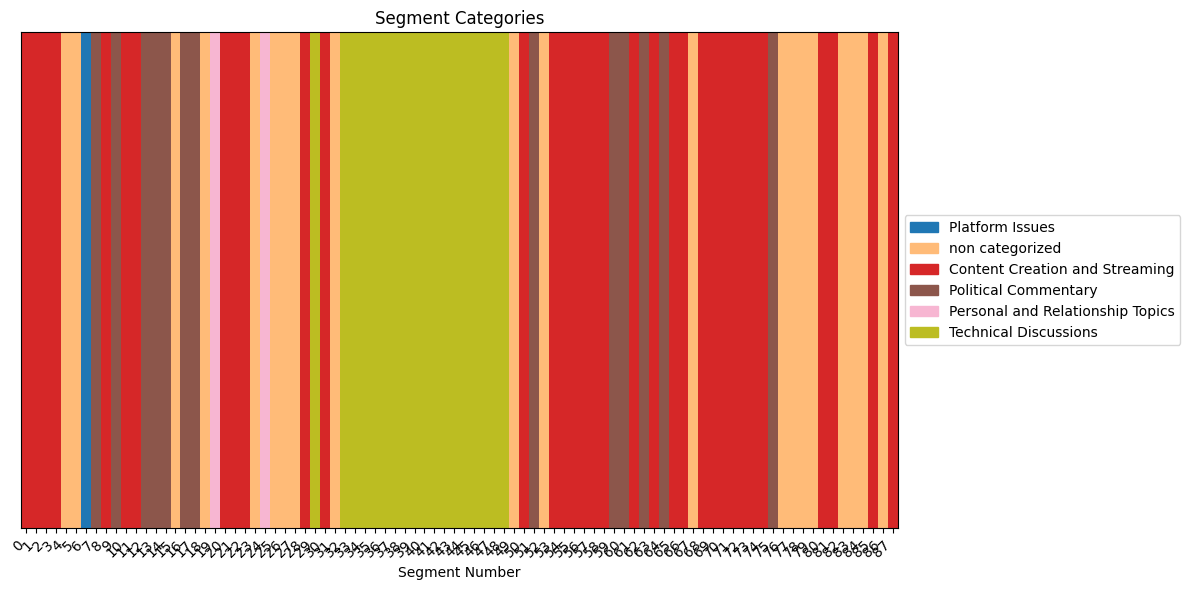

In [106]:
# Create a color map
unique_categories = list(set(color_segments))
color_map = plt.cm.get_cmap('tab20')  # You can change 'tab20' to other colormaps
colors = {category: color_map(i/len(unique_categories)) for i, category in enumerate(unique_categories)}

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each segment as a colored rectangle
for i, segment in enumerate(color_segments):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, facecolor=colors[segment]))

# Customize the plot
ax.set_xlim(0, len(color_segments))
ax.set_ylim(0, 1)
ax.set_xticks(np.arange(len(color_segments)) + 0.5)
ax.set_xticklabels(range(len(color_segments)), rotation=45, ha='right')
ax.set_yticks([])
ax.set_xlabel('Segment Number')
ax.set_title('Segment Categories')

# Add a legend
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in unique_categories]
ax.legend(handles, unique_categories, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [124]:
# linked transcript has links on almost everything so to get the link at a given character count we must go throught hte nodes and count the characters
from bs4 import BeautifulSoup
def get_time_at_char_count(char_count, linked_transcript):

    #example of linked_transcript: <a href="https://youtu.be/23K0euDg0FU?t=201" target="_blank">What\'s </a><a href="https://youtu.be/23K0euDg0FU?t=202" target="_blank">this? </a>
    # Initialize BeautifulSoup with the linked transcript
    soup = BeautifulSoup(linked_transcript, 'html.parser')
    
    # Track the cumulative count of characters processed
    cumulative_count = 0

    temp_time=""
    
    # Iterate through each <a> tag in the transcript
    for link in soup.find_all('a'):
        # Text inside the current <a> tag
        link_text = link.get_text()
        
        # Update the cumulative count of characters by adding the length of the current link's text
        cumulative_count += len(link_text)
        
        # Check if the cumulative character count has reached or exceeded the specified character count
        if link.get('href') is not None:
            temp_time=link['href'].split("t=")[-1].split("s")[0]
        if cumulative_count >= char_count:
            # Return the URL (href attribute) of the current <a> tag
            return int(temp_time)
        
    print("Cumulative count", cumulative_count)
    # If no link is found at the specified character count, return None
    return int(temp_time)

In [125]:
print(type(get_time_at_char_count(0, stream_recap_data.linked_transcript)))
# print(get_time_at_char_count(1000, stream_recap_data.linked_transcript))

<class 'int'>


In [126]:
color_segments

color_and_width_segments=[]
for i, annotated_segment in enumerate(color_segments):
    width=get_time_at_char_count((i+1)*999, stream_recap_data.linked_transcript)-get_time_at_char_count(i*1000, stream_recap_data.linked_transcript)
    color_and_width_segments.append({"category": annotated_segment, "width": width})
    print(f"Segment {i}: {annotated_segment}, {width}")

Segment 0: Content Creation and Streaming, 188
Segment 1: Content Creation and Streaming, 158
Segment 2: Content Creation and Streaming, 108
Segment 3: Content Creation and Streaming, 125
Segment 4: non categorized, 203
Segment 5: non categorized, 226
Segment 6: Platform Issues, 84
Segment 7: Political Commentary, 51
Segment 8: Content Creation and Streaming, 79
Segment 9: Political Commentary, 40
Segment 10: Content Creation and Streaming, 59
Segment 11: Content Creation and Streaming, 53
Segment 12: Political Commentary, 55
Segment 13: Political Commentary, 78
Segment 14: Political Commentary, 59
Segment 15: non categorized, 64
Segment 16: Political Commentary, 80
Segment 17: Political Commentary, 124
Segment 18: non categorized, 97
Segment 19: Personal and Relationship Topics, 39
Segment 20: Content Creation and Streaming, 78
Segment 21: Content Creation and Streaming, 98
Segment 22: Content Creation and Streaming, 63
Segment 23: non categorized, 73
Segment 24: Personal and Relation

In [ ]:
color_segments

In [175]:
color_and_width_segments
color_and_width_segments_list=[]
for i, seg in enumerate(color_and_width_segments):
    category=color_segments[i]
    color_and_width_segments_list.append([category,seg["width"]])
    # color_and_width_segments_list.append([seg["category"],seg["width"]])


In [137]:
print(major_topics_str)

Content Creation and Streaming
Political Commentary
Platform Issues
Technical Discussions
Personal and Relationship Topics


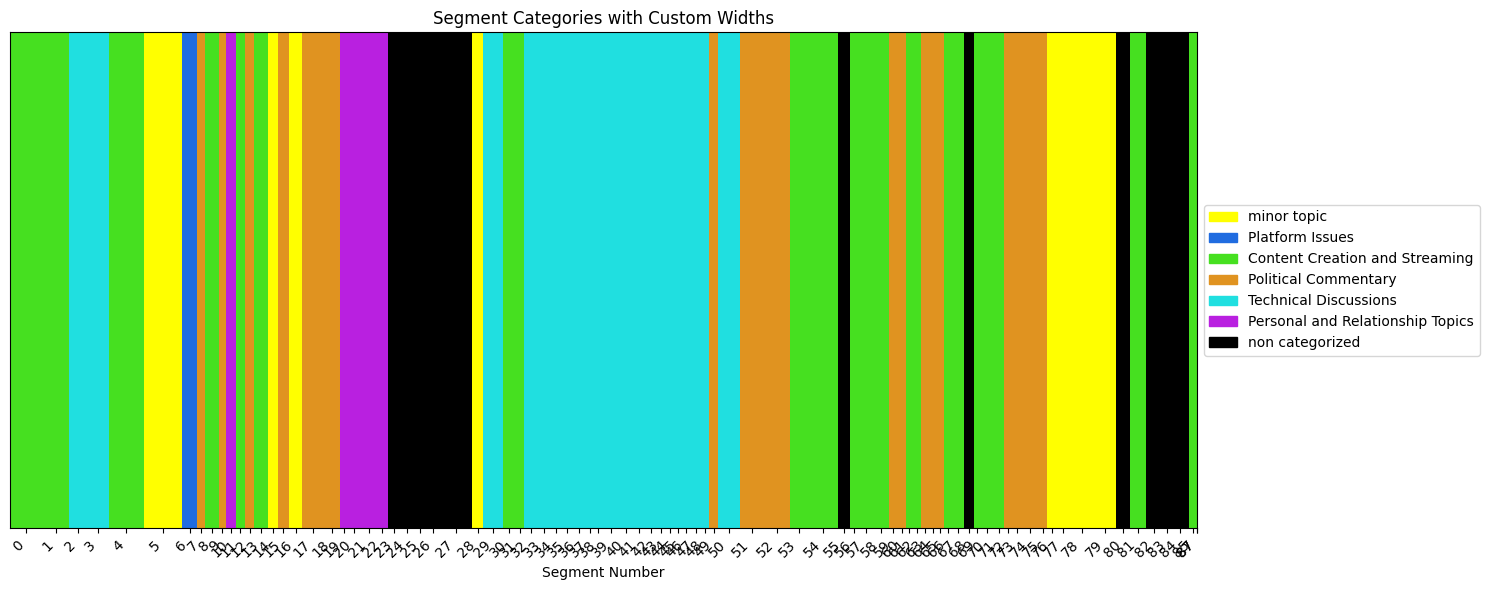

In [185]:
def plot_stream(segments):
    
    # segments = [
    #     ("Streaming and Content Creation", 1),
    #     ("Technical Discussion", 2),
    #     ("Technical Discussion", 1),
    #     ("Technical Discussion", 1),
    #     ("non categorized", 0.5),
    #     ("non categorized", 0.5),
    #     ("Platform Discussions", 1.5),
    #     ("Platform Discussions", 1.5),
    #     ("Streamer Relationships", 1),
    #     ("Personal Philosophy", 2),
    #     ("Personal Reflections and Debate Strategy", 2.5),
    #     ("Debate Challenges and Frustrations", 1),
    #     ("Critique of Dave Smith", 1),
    #     ("Debate Culture and Political Alignments", 2),
    #     ("COVID-19 Misinformation", 1),
    #     ("Political Extremes and Historical Parallel", 1.5)
    # ]

    # Custom colors for specific categories
    custom_colors = {
        "Technical Discussion": "#FF9999",
        "Personal Philosophy": "#66B2FF",
        "COVID-19 Misinformation": "#FF0000"
    }

    # Content Creation and Streaming
    # Political Commentary
    # Platform Issues
    # Technical Discussions
    # Personal and Relationship Topics


    color_list_order_hue=[
        #green, orange, blue, turquoise, purple in hue and then later converted to hex
    
        # hue as a number for each color
        0.3, # green
        0.1, # orange
        0.6, # blue
        0.5, # turquoise
        0.8, # purple
    ]

    saturation=0.75
    lightness=0.5

    color_list_order=[]
    import colorsys
    def hue_to_hex(hue_val):
        h = hue_val
        s = saturation
        l = lightness
        r, g, b = [int(256*i) for i in colorsys.hls_to_rgb(h, l, s)]
        return "#{:02x}{:02x}{:02x}".format(r, g, b)



    for hue in color_list_order_hue:
        color_list_order.append(hue_to_hex(hue))
    
        




    custom_colors = {
        "Content Creation and Streaming": color_list_order[0],
        "Political Commentary": color_list_order[1],
        "Platform Issues": color_list_order[2],
        "Technical Discussions": color_list_order[3],
        "Personal and Relationship Topics": color_list_order[4],
        # yellow
        "minor topic": "#FFFF00",
        # white
        "non categorized": "#000000"#"#FFFFFF"
    }

    # Create a color map for categories without custom colors
    unique_categories = list(set(category for category, _ in segments))
    color_map = plt.cm.get_cmap('tab20')
    auto_colors = {category: color_map(i/len(unique_categories)) 
                for i, category in enumerate(unique_categories) 
                if category not in custom_colors}

    # Combine custom and auto-generated colors
    colors = {**custom_colors, **auto_colors}

    colors=custom_colors

    # Create the plot
    fig, ax = plt.subplots(figsize=(15, 6))

    # Plot each segment as a colored rectangle
    current_x = 0
    for category, width in segments:
        # if colors.get(category, None) is None:
        #     ax.add_patch(plt.Rectangle((current_x, 0), width, 1))
        # else:
        ax.add_patch(plt.Rectangle((current_x, 0), width, 1, facecolor=colors[category]))
        current_x += width

    # Customize the plot
    ax.set_xlim(0, current_x)
    ax.set_ylim(0, 1)
    ax.set_xticks(np.cumsum([width for _, width in segments]) - [width/2 for _, width in segments])
    ax.set_xticklabels(range(len(segments)), rotation=45, ha='right')
    ax.set_yticks([])
    ax.set_xlabel('Segment Number')
    ax.set_title('Segment Categories with Custom Widths')

    # Add a legend
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in unique_categories]
    ax.legend(handles, unique_categories, loc='center left', bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.show()

plot_stream(color_and_width_segments_list)

In [111]:
color_segments

['Content Creation and Streaming',
 'Content Creation and Streaming',
 'Content Creation and Streaming',
 'Content Creation and Streaming',
 'non categorized',
 'non categorized',
 'Platform Issues',
 'Political Commentary',
 'Content Creation and Streaming',
 'Political Commentary',
 'Content Creation and Streaming',
 'Content Creation and Streaming',
 'Political Commentary',
 'Political Commentary',
 'Political Commentary',
 'non categorized',
 'Political Commentary',
 'Political Commentary',
 'non categorized',
 'Personal and Relationship Topics',
 'Content Creation and Streaming',
 'Content Creation and Streaming',
 'Content Creation and Streaming',
 'non categorized',
 'Personal and Relationship Topics',
 'non categorized',
 'non categorized',
 'non categorized',
 'Content Creation and Streaming',
 'Technical Discussions',
 'Content Creation and Streaming',
 'non categorized',
 'Technical Discussions',
 'Technical Discussions',
 'Technical Discussions',
 'Technical Discussions',
 

In [109]:
print(test_text_chunks[54])

: When all that drama happened. Oh, no, don't.

Destiny: Here we go.

C: Me bitch. I was being quiet.

B: I let him say everything he had to say about me.

C: Now it's time to talk about yourife crackheaded ass. I don't give a fuckue. Everybody treats you like the golden boy, nigga. You not the golden boy, nigga. Fuck you, nigga. You came out of an ass.

Destiny: Wa. Bruce is still on twitch. Yeah, I think he got unanned.

D: Right.

Destiny: What you saying? In be jy, younna be chinese. Okay. He may be small, but he holds a ginormous place in our hearts. Happy birthday, slimy. We love you. Go to hell. Okay, this is spam. No sources. Oo, no sources. So many people are saying it's fake. Sounds like we're. Wait, where the fuck is the remove post? If I market a spam, does that remove it? What the fuck is this? Removal? Okay. Oh, my God, it's a shitpost. Oh, wait, I wasn't even the wrong thing. Oh, shit. Did I just like report the wrong thing? Fuck. Sorry. It's labeled shitpost. If it's la

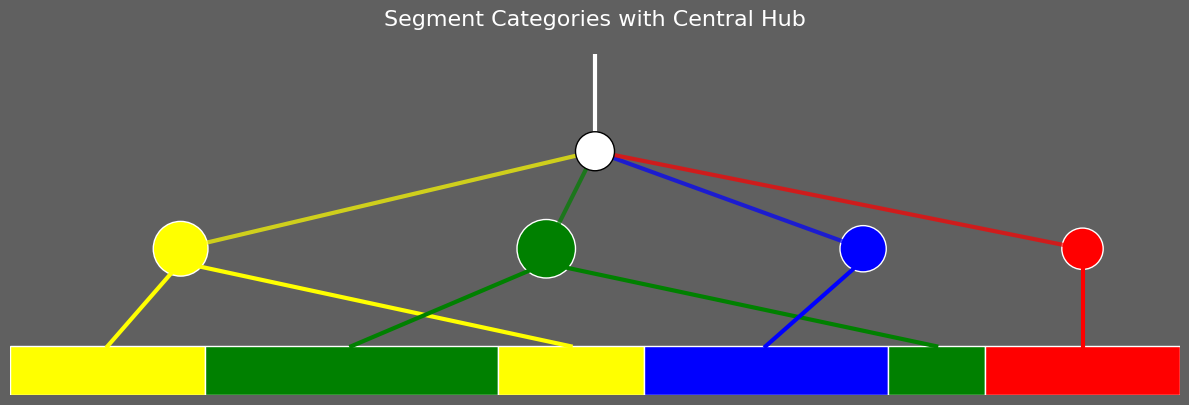

In [198]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Data structure
segments = [
    {"category": "A", "width": 2, "color": "yellow"},
    {"category": "B", "width": 3, "color": "green"},
    {"category": "A", "width": 1.5, "color": "yellow"},
    {"category": "C", "width": 2.5, "color": "blue"},
    {"category": "B", "width": 1, "color": "green"},
    {"category": "D", "width": 2, "color": "red"},
]

# Create the plot with a specific gray background
fig, ax = plt.subplots(figsize=(12, 10))
fig.patch.set_facecolor('#606060')  # Set figure background to [96, 96, 96]
ax.set_facecolor('#606060')  # Set axes background to [96, 96, 96]

# Plot bar segments and collect category information
current_x = 0
category_info = defaultdict(lambda: {"total_width": 0, "segments": []})

for i, segment in enumerate(segments):
    ax.add_patch(plt.Rectangle((current_x, 0), segment['width'], 0.5, 
                               facecolor=segment['color'], edgecolor='white'))
    
    category_info[segment['category']]['total_width'] += segment['width']
    category_info[segment['category']]['segments'].append((current_x, segment['width']))
    category_info[segment['category']]['color'] = segment['color']
    
    current_x += segment['width']

total_width = current_x

# Plot circles and connecting lines
circle_y = 1.5  # Y-coordinate for category circles
current_x = 0
circle_centers = []

for category, info in category_info.items():
    # Calculate x position for the circle (center of all segments of this category)
    circle_x = current_x + info['total_width'] / 2
    
    # Draw the circle
    circle_size = np.sqrt(info['total_width']) * 0.15
    circle = plt.Circle((circle_x, circle_y), circle_size, 
                        facecolor=info['color'], edgecolor='white')
    ax.add_artist(circle)
    
    # Store circle center and color for later use
    circle_centers.append((circle_x, circle_y, info['color']))
    
    # Draw connecting lines for each segment of this category
    for segment_start, segment_width in info['segments']:
        segment_center = segment_start + segment_width / 2
        ax.plot([segment_center, circle_x], [0.5, circle_y - circle_size/2], 
                color=info['color'], linewidth=3)  # Increased linewidth
    
    current_x += info['total_width']

# Add central white circle
central_y = 2.5
central_circle = plt.Circle((total_width/2, central_y), 0.2, 
                            facecolor='white', edgecolor='black', zorder=10)
ax.add_artist(central_circle)

# Connect category circles to central circle with colored lines
for circle_x, circle_y, color in circle_centers:
    ax.plot([circle_x, total_width/2], [circle_y, central_y], 
            color=color, linewidth=3, linestyle='-', alpha=0.7)  # Increased linewidth

# Add white line extending upward from central circle
top_y = 100  # Adjust this value to change the length of the line
ax.plot([total_width/2, total_width/2], [central_y, top_y], 
        color='white', linewidth=3, solid_capstyle='round')  # Added white line

# Customize the plot
ax.set_xlim(0, total_width)
ax.set_ylim(0, 3.5)
ax.set_aspect('equal', adjustable='box')
ax.axis('off')

# Add title
plt.title('Segment Categories with Central Hub', fontsize=16, pad=20, color='white')

plt.tight_layout()
plt.savefig('segment_central_hub_chart.png', dpi=300, bbox_inches='tight')
plt.show()